## Feature Engineering

## Numerical columns

In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# impo

In [3]:
df = pd.DataFrame({
    'x1' : np.random.normal(0,2,10000),
    'x2' : np.random.normal(5,3,10000),
    'x3' : np.random.normal(-5,5,10000)
})

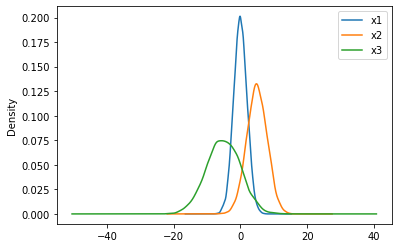

In [6]:
df.plot.kde();

In [8]:
from sklearn.preprocessing import StandardScaler

each value is scaled using the formula 



(x(i) - mean(x))/stdev(x)

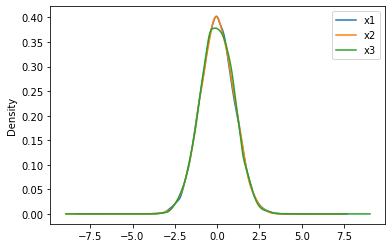

In [11]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df), columns = ['x1','x2','x3'])
df.plot.kde()

After applying Standard Scalar the data will be having a mean of 0 and standard deviation of 1

## Minmax Scaler

Subtract min of column & div by difference between max or min

Data shifts between 0 & 1

(x(i) - min(x))/(max(x)-min(x))

Sensitive to outliers

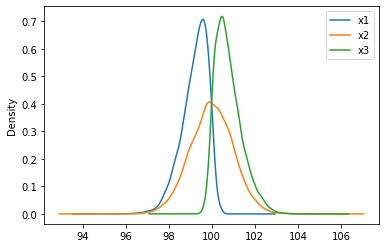

In [31]:
from scipy.stats import skewnorm

numValues = 10000
maxValue = 100
skewness = 5     #Negative values are left skewed, positive values are right skewed.

x1 = skewnorm.rvs(a = -5, loc=maxValue, size=numValues)  #Skewnorm function
x2 = skewnorm.rvs(a = 0, loc=maxValue, size=numValues)  #Skewnorm function
x3 = skewnorm.rvs(a = 5, loc=maxValue, size=numValues)  #Skewnorm function

df = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3})

df.plot.kde()
plt.show()



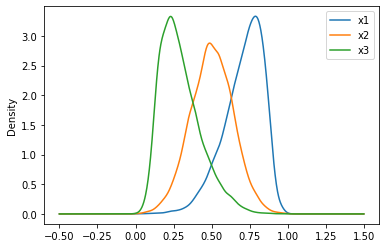

In [32]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_df = minmax.fit_transform(df)

data_df = pd.DataFrame(data_df, columns=['x1','x2','x3'])
data_df.plot.kde();

## Robust Scaler
Suited for data with outliers

Calculate by subracting 1st-quartile & div by differnce between quartile-3 & quartile-1


(x(i)-Q1(x))/(Q3(x)-Q1(x))

In [62]:
np.random.seed(0)
df = pd.DataFrame(np.random.randn(100,3),columns=list('ABC'))
df.iloc[::10] += np.random.randn() *2

In [44]:
import seaborn as sns

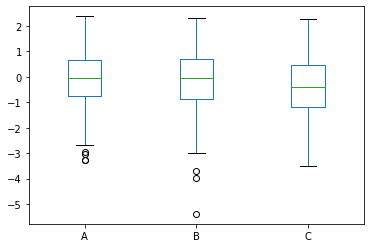

In [63]:
df.plot(kind='box')

Box plot is to show there are outliers in the data

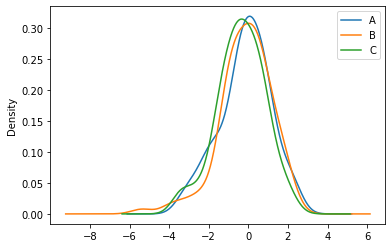

In [64]:
df.plot.kde()

In [65]:
from sklearn.preprocessing import RobustScaler

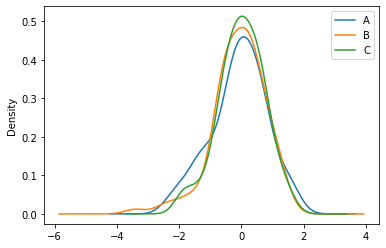

In [66]:
rs =  RobustScaler()
df = pd.DataFrame(rs.fit_transform(df), columns = list('ABC'))
df.plot.kde()
                  

In [ ]:
## Binning

In [159]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
def f(r):
    if r <= 15:
        return 'Child'
    elif r <= 25:
        return 'Teenagers'
    elif r <= 45:
        return "Middle_aged"
    else:
        return 'Old'
    
df['Age'] = df['Age'].map(f)

In [165]:
df['Age'].unique()

array(['Teenagers', 'Middle_aged', 'Old', 'Child'], dtype=object)

## Categorical Values

### Ordinal Values

In [77]:
df = pd.DataFrame({'Age':[32,24,54,12,34,12,43,34,36,53,27],
             "Salary" : ['Low','High','Medium','Medium',"High",'Low','High','Low','Medium','Low','Medium']})
df1 = df.copy()
df

,Age,Salary
0,32,Low
1,24,High
2,54,Medium
3,12,Medium
4,34,High
5,12,Low
6,43,High
7,34,Low
8,36,Medium
9,53,Low


In [78]:
Salary_encod = {'Low':0,'Medium':1,'High':2}
df['Salary'] = df['Salary'].map(Salary_encod)
df

,Age,Salary
0,32,0
1,24,2
2,54,1
3,12,1
4,34,2
5,12,0
6,43,2
7,34,0
8,36,1
9,53,0


In [79]:
#using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df1['Salary'] = oe.fit_transform(df1[['Salary']])
df1

,Age,Salary
0,32,1.0
1,24,0.0
2,54,2.0
3,12,2.0
4,34,0.0
5,12,1.0
6,43,0.0
7,34,1.0
8,36,2.0
9,53,1.0


### Nomial Values

In [97]:
df = pd.DataFrame({'Age':[32,24,54,12,34,12],
             "Sex" : ['Male','Female','Male','Male','Female','Female']})
df1 = df.copy()

In [92]:
df

,Age,Sex
0,32,Male
1,24,Female
2,54,Male
3,12,Male
4,34,Female
5,12,Female


In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

,Age,Sex
0,32,1
1,24,0
2,54,1
3,12,1
4,34,0
5,12,0


## One Hot Encoding

In [99]:
pd.get_dummies(df1['Sex'],drop_first=True)
# drop_first drops first value which is female, when male is 0 it means female is 1, just that it does not need to be represented this way reduces the dimensions

,Male
0,1
1,0
2,1
3,1
4,0
5,0


In [104]:
df1[['Age']].join(pd.get_dummies(df1['Sex'],drop_first=True))

,Age,Male
0,32,1
1,24,0
2,54,1
3,12,1
4,34,0
5,12,0


When the cardinality(number of categories in a column) is large onehotencoding increases the dimensions significantly.Let's see how to deal with it

In [108]:
df=pd.read_csv('mercedes.csv', usecols=["X0","X1","X2","X3","X4","X5"]) 
df.head()

,X0,X1,X2,X3,X4,X5
0,k,v,at,a,d,u
1,k,t,av,e,d,y
2,az,w,n,c,d,x
3,az,t,n,f,d,x
4,az,v,n,f,d,h


In [109]:
for i in df.columns:
    print(i , len(df[i].unique()))

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29


X0 has 47 unique values

In [115]:
df['X0'].value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [116]:
top_10 = list(df['X0'].value_counts().sort_values(ascending=False).head(10).index)
top_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [117]:
for categories in top_10:
    df[categories] = np.where(df['X0']==categories,1,0)

In [118]:
top_10.append('X0')

In [119]:
df[top_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al


Instead of getting 46 columns for X0 when encoded using onehot, we got 10

## Count for frequency Encoding

In [121]:

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [122]:
columns=[1,3,5,6,7,8,9,13]
train_set=train_set[columns]

train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [123]:
for feature in train_set.columns:
    print(feature, ':', len(train_set[feature].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


country has 42 labels

In [126]:
Country_map =train_set['Country'].value_counts().to_dict()

In [128]:
train_set['Country'] = train_set['Country'].map(Country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


## Target Guided Ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [148]:
df = pd.read_csv('titanic_train.csv',usecols = ['Cabin', 'Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [149]:
df['Cabin'].fillna('Missing',inplace=True)

In [150]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [151]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [152]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [153]:
ordinal_labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [154]:
labels_dict = {k:i for i,k in enumerate(ordinal_labels,0)}
labels_dict

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [155]:
df['Cabin_ordinal_labels'] = df['Cabin'].map(labels_dict)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Mean Encoding

In [157]:
mean_ordinal  = df.groupby(['Cabin'])['Survived'].mean().to_dict()
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [158]:
df['mean_ordinal_encode'] = df['Cabin'].map(mean_ordinal)
df.head()

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854
